<a href="https://colab.research.google.com/github/Maiiiyasser/Lane-Detection-/blob/main/Lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Original Image


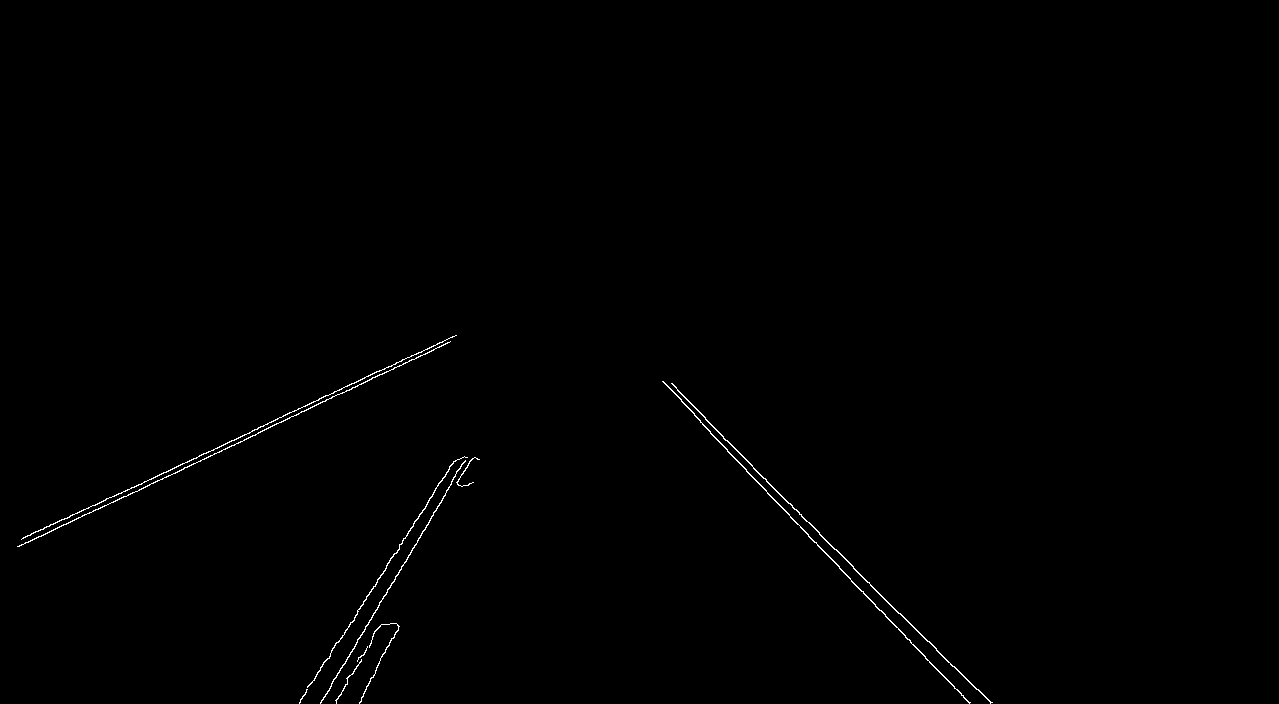

In [6]:
def get_image():
  img = cv2.imread('/content/testHough.jpg')
  print('Original Image')
  # cv2_imshow(img)
  return img
road_img = get_image()
median = cv2.medianBlur(road_img,5)
# cv2_imshow(road_img)
canny_image = cv2.Canny(median, 100, 200)
# cv2_imshow(canny_image)
height = road_img.shape[0]
polygons = np.array([
[(-70, height), (2100, height), (170, 270)]
])
mask = np.zeros_like(canny_image)
# Fill poly-function deals with multiple polygon
cv2.fillPoly(mask, polygons, 255) 
# Bitwise operation between canny image and mask image
masked_image = cv2.bitwise_and(canny_image, mask) 
cv2_imshow(masked_image)

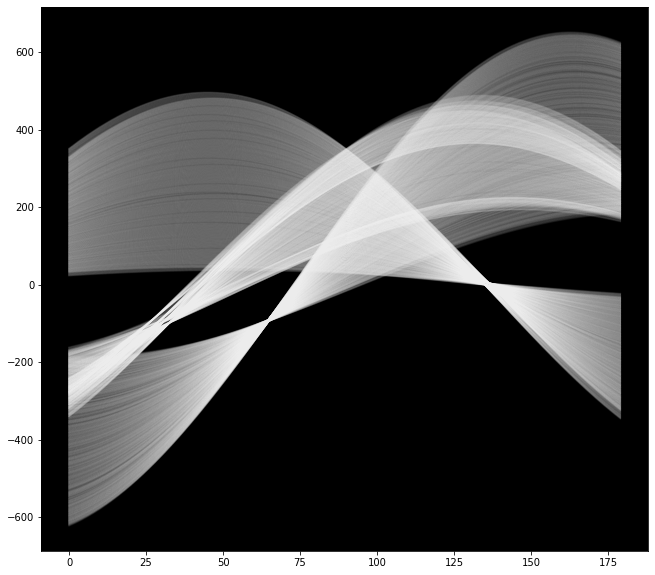

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.45995103e+03, -1.44372935e+03, -1.42750767e+03, -1.41128599e+03,
        -1.39506431e+03, -1.37884264e+03, -1.36262096e+03, -1.34639928e+03,
        -1.33017760e+03, -1.31395592e+03, -1.29773425e+03, -1.28151257e+03,
        -1.26529089e+03, -1.24906921e+03, -1.23284753e+03, -1.21662586e+03,
        -1.20040418e+03, -1.18418250e+03, -1.16796082e+03, -1.15173914e+03,
        -1.13551747e+03, -1.11929579e+03, -1.10307411e+03, -1.08685243e+03,
        -1.07063075e+03, -1.05440907e+03, -1.03818740e+03, -1.02196572e+03,
        -1.00574404e+03, -9.89522362e+02, -9.73300684e+02, -9.57079006e+02,
        -9.40857328e+02, -9.24635650e+02, -9.08413972e+02, -8.92192294e+02,
        -8.75970616e+02, -8.59748938e+02, -8.43527260e+02, -8.27305

In [7]:
def line_detection_non_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  accumulator = np.zeros((len(rhos), len(rhos)))
  figure = plt.figure(figsize=(50, 10))
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho))
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)
  plt.show()
  return accumulator, rhos, thetas
line_detection_non_vectorized(median, masked_image)

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
def hough(img,threshhold = 100):
    rho=[]
    thetaa = []
    theta = np.arange(0,180)
    r,c = img.shape
    rho_l = int(2*(np.ceil(np.sqrt((r-1)**2 + (c-1)**2))))
    rho_len = rho_l
    H = np.zeros((rho_len, len(theta)))
    
    for i in range(r):
        for j in range(c):
            if img[i][j]==255:
                for t in theta:
                    p = j* np.cos((t*(np.pi/180))) + i * np.sin((t*(np.pi/180)))
                    p = round((p))                  
                    
                    H[int(p)][t] = H[int(p)][t] + 1
                    if H[int(p)][t] >= threshhold:
                        rho.append(int(p))

                        thetaa.append(t)                  
                                          
    return (rho,thetaa,H)

In [9]:
def get_my_lines(img, masked_img, polygon):
  rho, thetaa, H = hough(masked_img)
          
  for i in range(len(rho)):
      rh = rho[i]
      theta = np.deg2rad(thetaa[i])
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rh
      y0 = b*rh


      x1 = int(x0 + 1500*(-b))
      y1 = int(y0 + 1500*(a))
      x2 = int(x0 - 1500*(-b))
      y2 = int(y0 - 1500*(a))

      cv2.line(masked_img,(x1,y1),((x2),y2),(255,0,0),3)
  
  # polygon1 = np.array([
  # [(-70, height), (2100, height), (170, 270)]
  # ])

  # polygon2 = np.array([
  # [(-300, height), (1300, height), (400, 320)]
  # ])


  mask = np.zeros_like(masked_img)
  cv2.fillPoly(mask, polygon, 255) 
  masked_image = cv2.bitwise_and(masked_img, mask)

  backtorgb = cv2.cvtColor(masked_image,cv2.COLOR_GRAY2RGB)
  output = cv2.addWeighted(img,0.7,backtorgb,0.7,0)
  cv2_imshow(output)  

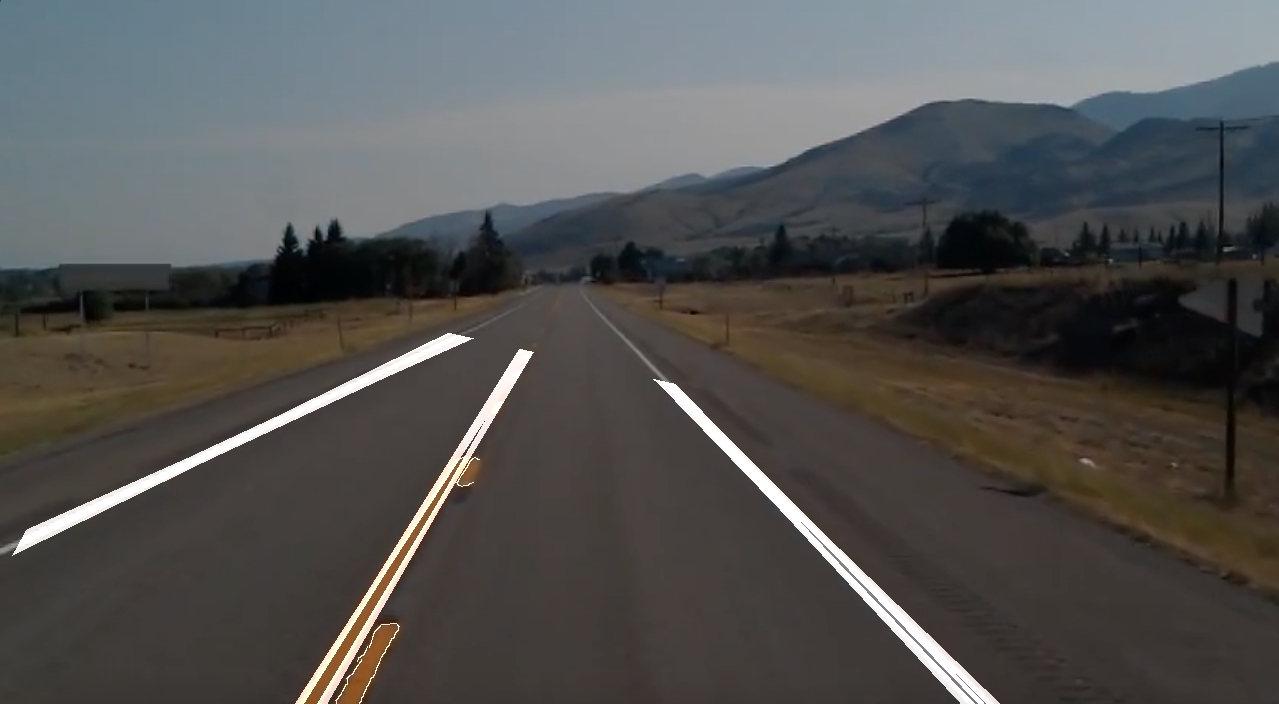

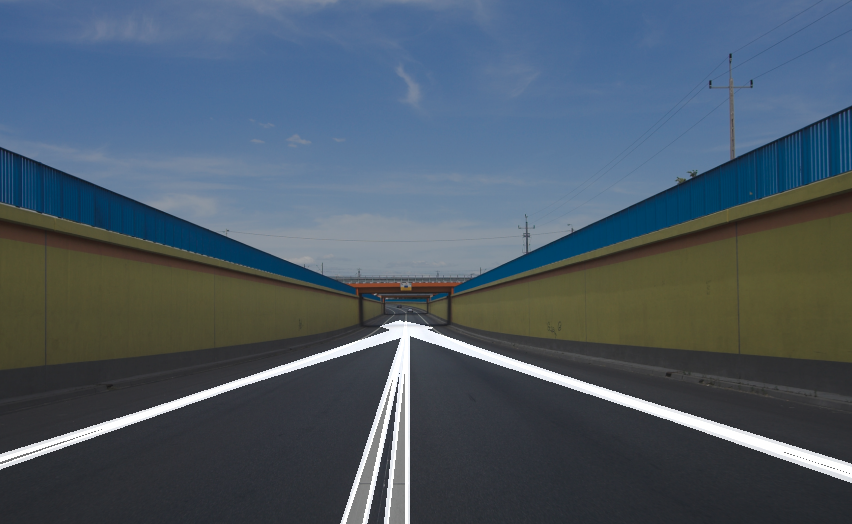

In [10]:
img1 = cv2.imread('/content/testHough.jpg')
img2 = cv2.imread('/content/testHough1.png')

median1 = cv2.medianBlur(img1,5)
median2 = cv2.medianBlur(img2,5)


canny_image1 = cv2.Canny(median1, 100, 200)
canny_image2= cv2.Canny(median2, 100, 200)


height1 = img1.shape[0]
height2 = img2.shape[0]

polygon1 = np.array([
[(-70, height1), (2100, height1), (170, 270)]
])

polygon2 = np.array([
[(-300, height2), (1300, height2), (400, 320)]
])

mask1 = np.zeros_like(canny_image1)
mask2 = np.zeros_like(canny_image2)

cv2.fillPoly(mask1, polygon1, 255)
cv2.fillPoly(mask2, polygon2, 255)

masked_image1 = cv2.bitwise_and(canny_image1, mask1)
masked_image2 = cv2.bitwise_and(canny_image2, mask2) 


get_my_lines(img1, masked_image1, polygon1)
get_my_lines(img2, masked_image2, polygon2)